<a href="https://colab.research.google.com/github/hhchin1995/plastic-quality-clustering/blob/main/Cluster_plastic_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

# dataset = pd.read_csv('PRES_plastic4-1.csv')
dataset = pd.read_csv('Plastic_PP_All_2.csv')
# PET
# X = dataset.iloc[:-54, 2:4].values
# y = dataset.iloc[:-54, 5].values

# PE
# X = dataset.iloc[15:-20, 2:5].values
# X[:,1]=X[:,2]
# X=X[:,:-1]
# y = dataset.iloc[15:-20, 5].values



# PP
# X = dataset.iloc[50:, 2:5].values
# X[:,1]=X[:,2]
# X=np.delete(X,8,0)
# X=X[:,:-1]
# y = dataset.iloc[50:, 5].values
# y=np.delete(y,8,0)
X_c = dataset.iloc[0:300, 2:23].values
Source = dataset.iloc[300:304, 2:23].values
Sink = dataset.iloc[304:309, 2:23].values
print(X_c.shape)
print(Source)
print(Sink)

y_train=dataset.iloc[:, 0].values



Saving Plastic_PP_All_2.csv to Plastic_PP_All_2.csv
(300, 21)
[[8.43576320e-02 5.05109968e+00 1.20807632e+00 2.29478363e+00
  1.83240062e+01 1.05926093e+02 1.21331304e+00 6.70974401e-01
  2.17627488e+00 7.65434941e-01 1.41054521e+01 2.15187448e+01
  2.32877305e+03 2.49596328e+01 3.52991826e+02 5.48046576e+01
  2.33977593e+01 2.00000000e+00 2.00000000e+00 2.00000000e+00
  3.00000000e+00]
 [1.00220953e-01 6.15650474e-01 5.24550135e-01 5.35459895e+00
  9.50838475e+00 9.08333248e+01 1.35811194e+00 8.07175113e-01
  1.02255555e+00 8.35115398e-01 1.71040309e+01 7.44588880e-01
  1.51669333e+03 2.28410479e+01 1.20675180e+02 5.44457273e+01
  2.33086363e+01 2.00000000e+00 2.00000000e+00 2.00000000e+00
  3.00000000e+00]
 [3.53454866e-01 4.17004510e-02 3.01455294e+00 1.76138917e+01
  2.08240807e+01 3.50415337e+02 1.77621984e+00 1.40000000e-01
  1.27102715e+00 3.41979975e+00 2.05862699e-01 1.17882681e-01
  2.58405555e+03 1.04028929e+01 1.69024279e+02 2.06491956e+01
  1.04038638e+01 2.36880558e+00 2.

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_c)
X_c=sc.transform(X_c)
Source=sc.transform(Source)
Sink=sc.transform(Sink)


print(X_c[26])

[ 1.8219953   2.65578636  2.90693391 -0.0309338  -0.27786023 -0.55665403
  0.25434403  0.87631421  1.31145357  1.25569069  0.63339512 -0.63795606
 -0.79911855 -0.18231887  1.45600974  0.94139552  0.35951824 -0.47872429
 -0.47497191 -0.4756626  -0.50635829]


Custom Sampling (clean data)

Clustering

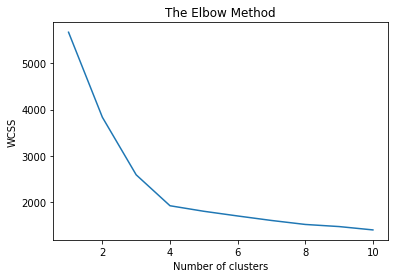

In [ ]:
# Using the elbow method to find the optimal number of clusters




#####X_c=X_train


#X_c = sc.fit_transform(X_c)




from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_c)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying PCA on data**

[0.30496353 0.22197953 0.12847509 0.04267092 0.03093002 0.02821372
 0.02768229 0.02681732 0.02456117 0.02289968 0.02100327 0.0193943 ]
0.8995908525908864
[0.30496353 0.22197953 0.12847509 0.04267092 0.03093002 0.02821372
 0.02768229 0.02681732 0.02456117 0.02289968 0.02100327 0.0193943 ]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.30496353 0.52694306 0.65541815 0.69808907 0.7290191  0.75723282
 0.78491511 0.81173243 0.8362936  0.85919328 0.88019655 0.89959085]


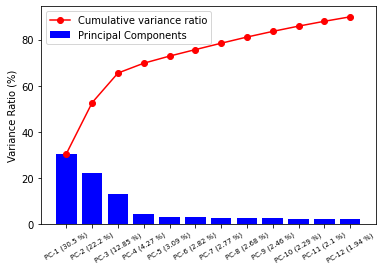

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 12)    # Set to 10 for 90% variance
X_c= pca.fit_transform(X_c)
Source=pca.transform(Source)
Sink=pca.transform(Sink)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
ev=pca.explained_variance_ratio_
print(ev)
var=[0]*X_c.shape[1]
for i in range(0,X_c.shape[1]):
    var[i]=i
print(var)

plt.bar(var,list(ev*100),label='Principal Components',color='b')
n=list(ev*100)
pc=[]
for i in range(len(n)):
  n[i]=round(n[i],2)
  pc.append('PC-'+str(i+1)+' ('+str(n[i])+' %)')
plt.xticks(var,pc, fontsize=7, rotation=30)
plt.ylabel('Variance Ratio (%)')

for i in range(1,len(ev)):
  ev[i]=ev[i]+ev[i-1]

cum_ev=ev
print(cum_ev)
plt.plot(var,list(cum_ev*100),label='Cumulative variance ratio',color='r',marker='o')
plt.legend()
plt.show()


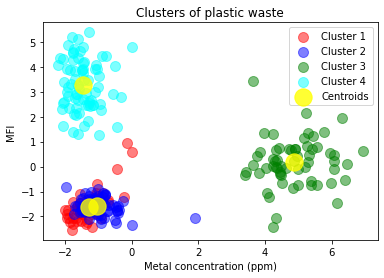

(300, 12)
0.4030634678448397
0.9483468991414701
191.27248689543887


In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_c)
#X_c = sc.inverse_transform(X_c)
# kmeans.cluster_centers_ = sc.inverse_transform(kmeans.cluster_centers_)

# Visualising the clusters
plt.scatter(X_c[y_kmeans == 0, 0], X_c[y_kmeans == 0, 1], s = 100, alpha=0.5,c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_kmeans == 1, 0], X_c[y_kmeans == 1, 1], s = 100,  alpha=0.5,c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_kmeans == 2, 0], X_c[y_kmeans == 2, 1], s = 100,  alpha=0.5,c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_kmeans == 3, 0], X_c[y_kmeans == 3, 1], s = 100, alpha=0.5, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X_c[y_kmeans == 4, 0], X_c[y_kmeans == 4, 1], s = 100, alpha=0.5, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], alpha=0.8,s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of plastic waste')
plt.xlabel('Metal concentration (ppm)')
plt.ylabel('MFI ')
plt.legend()
plt.show()
print(X_c.shape)
# Evaluation
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
print(metrics.silhouette_score(X_c, labels, metric='euclidean'))
print(davies_bouldin_score(X_c, labels))
print(metrics.calinski_harabasz_score(X_c, labels))

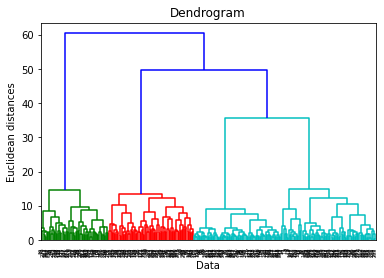

In [ ]:
import scipy.cluster.hierarchy as sch
#X_c = sc.fit_transform(X_c)

dendrogram = sch.dendrogram(sch.linkage(X_c, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters =4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_c)
#X_c = sc.inverse_transform(X_c)

# Evaluation
print(metrics.silhouette_score(X_c, y_hc, metric='euclidean'))
print(davies_bouldin_score(X_c, y_hc))
print(metrics.calinski_harabasz_score(X_c, y_hc))

0.3935603518841022
0.971437876270411
187.14595042020528


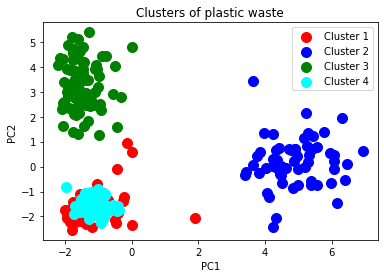

In [ ]:
# Visualising the clusters
plt.scatter(X_c[y_hc == 0, 0], X_c[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_hc == 1, 0], X_c[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_hc == 2, 0], X_c[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_c[y_hc == 3, 0], X_c[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X_c[y_hc == 4, 0], X_c[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**Fit new data**

In [ ]:
# Fit KNN
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_c, y_hc)
# preds = pd.DataFrame(knn.predict_proba(x_c_scaled))

print(Source)
Source_preds=pd.DataFrame(knn2.predict_proba(Source))
Source_preds.columns = ['label_0', 'label_1','label_2','label_3']
print(Source_preds)

Sink_preds=pd.DataFrame(knn2.predict_proba(Sink))
Sink_preds.columns = ['label_0', 'label_1','label_2','label_3']
print(Sink_preds)

[[-1.60406941e+00 -1.19046688e+00 -1.91364614e+00 -2.96689898e-01
  -1.10375739e-01  6.83871191e-01  6.09241104e-01  4.33025733e-01
  -5.75893029e-01  2.56740283e-01 -3.15106959e-02  3.50398226e-03]
 [-1.04608959e+00 -1.37515779e+00 -1.35322758e+00 -3.17930862e-01
  -1.04095475e-01 -1.58731335e-01 -1.12971792e-01  1.30532423e-01
   5.54221419e-01  1.41158743e-01  2.72205612e-01  5.31613517e-01]
 [ 4.75940153e+00 -3.71786028e-02 -2.24464726e-01  1.26083776e+00
  -1.82822114e-01 -1.01410648e+00 -3.54424987e-01 -7.24876169e-01
   1.35352639e-01  8.15904112e-01  1.35680362e+00  4.82506787e-01]
 [-6.93520027e-01 -1.38803938e+00 -2.25320806e+00  7.46446321e-01
   6.35670043e-01  1.32957669e-01 -1.03842267e-01 -1.23086596e-01
  -2.92969410e-01 -6.24089324e-01 -3.09575980e-01 -2.00367257e-01]]
   label_0  label_1  label_2  label_3
0      0.0      0.0      0.0      1.0
1      0.0      0.0      0.0      1.0
2      0.0      1.0      0.0      0.0
3      0.0      0.0      0.0      1.0
   label_0  l

**DBSCAN**

In [ ]:
i=np.identity(dataset.shape[1]-5)
print(pca.transform(i))

In [ ]:
from sklearn.cluster import DBSCAN
#X_c = sc.fit_transform(X_c)
db = DBSCAN(eps=0.22, min_samples=30).fit(X_c)
labels = db.labels_
print(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_c, labels))

In [ ]:
from sklearn.cluster import AffinityPropagation
# Compute Affinity Propagation
af = AffinityPropagation(preference=-1.2, random_state=10,affinity='euclidean').fit(X_c)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(labels)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X_c, labels, metric="sqeuclidean")
)

[2 2 2 2 0 2 0 0 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 2 1 0 0 3 1 3 3 0 1 1 0 1 2
 2 2 0 1 3 1 2 2 0 3 3 3 0 0 0 3 2 1 1 2 1 2 0 1 1 2 0 1 3 0 3 0 2 2 1 0 0
 1 3 3 2 1 0 1 0 2 2 1 3 0 0 1 1 3 2 3 3 2 3 2 3 2 2 1 0 0 0 0 0 2 0 2 0 3
 1 1 3 1 1 1 1 1 3 1 1 2 1 1 0 2 0 3 0 3 2 1 1 0 1 0 1 1 0 1 1 2 3 2 0 3 0
 2 0 1 3 3 2 3 1 2 1 0 3 0 0 2 2 3 1 1 2 3 0 0 3 0 1 3 2 3 2 0 3 3 1 3 3 2
 1 3 3 1 3 2 3 1 1 2 0 3 1 0 2 1 0 0 0 3 0 3 1 0 0 2 0 0 3 3 0 2 0 3 2 1 1
 1 0 0 0 3 1 2 3 1 2 1 3 3 0 2 1 1 0 3 3 2 2 1 1 2 2 1 2 1 2 1 0 1 0 2 1 3
 2 0 3 1 1 1 0 1 3 3 0 3 3 2 1 1 0 1 3 3 1 2 0 0 2 1 2 2 3 3 2 3 2 1 0 3 3
 0 0 1 0 0 3 1 1 2]
Estimated number of clusters: 4
Silhouette Coefficient: 0.768
